In [1]:
import os
import time
import math
import re
import struct
import traceback
import codecs

import bitstring

import numpy as np
import matplotlib.pyplot as plt
# import cv2
import pandas as pd

from PIL import Image
import IPython.display as display

from JIS0208 import JIS0208

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'classes.tsv',
 'ETL8B2C1',
 'ETL8B2C2',
 'ETL8B2C3',
 'ETL8INFO',
 'etl_8b2_inspect_data.ipynb',
 'JIS0208.py',
 '__pycache__']

In [3]:
file_list = [
    'ETL8B2C1',
    'ETL8B2C2',
    'ETL8B2C3',
]

In [4]:
filename = file_list[0]
print(filename)
file_stream = bitstring.ConstBitStream(filename=filename)

ETL8B2C1


**The first record of each file is zero padded dummy.**

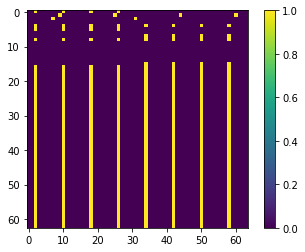

In [5]:
record = file_stream.readlist('int:16,uint:16,uint:32,bytes:504')
record_dict = {
    'sheet_number': record[0], # type: int - Serial Sheet Number
    'JIS_KANJI_CODE': record[1], # type: binary - JIS Kanji Code (JIS X 0208)
    'JIS_READING': record[2], # type: ASCII - JIS Typical Reading (e.g. 'AI.M')
    'image_data': record[3], # type: bytes
}

width = 64
height = 63

np_img = np.array(Image.frombytes('1', (width, height), record_dict['image_data'], 'raw')).astype(int)
plt.imshow(np_img)
plt.colorbar()

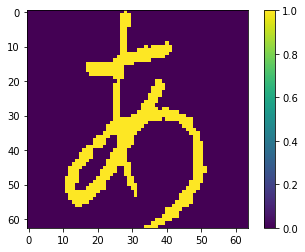

In [6]:
record = file_stream.readlist('int:16,uint:16,uint:32,bytes:504')
record_dict = {
    'sheet_number': record[0], # type: int - Serial Sheet Number
    'JIS_KANJI_CODE': record[1], # type: binary - JIS Kanji Code (JIS X 0208)
    'JIS_READING': record[2], # type: ASCII - JIS Typical Reading (e.g. 'AI.M')
    'image_data': record[3], # type: bytes
}

width = 64
height = 63

np_img = np.array(Image.frombytes('1', (width, height), record_dict['image_data'], 'raw')).astype(int)
plt.imshow(np_img)
plt.colorbar()

In [7]:
hex(record_dict['JIS_KANJI_CODE'])

'0x2422'

In [8]:
total_samples = 0
record_count = {}

for filename in file_list:

    file_stream = bitstring.ConstBitStream(filename=filename)
    # skip the first record in each file
    file_stream.readlist('bytes:512')

    while True:
        try:
            record = file_stream.readlist('int:16,int:16,uint:32,bytes:504')
        except:
            break
        
        total_samples += 1
        record_dict = {
            'sheet_number': record[0], # type: int - Serial Sheet Number
            'JIS_CODE': record[1], # type: binary - JIS Kanji Code (JIS X 0208)
            'JIS_READING': record[2], # type: ASCII - JIS Typical Reading (e.g. 'AI.M')
            'image_data': record[3], # type: bytes
        }
        
        jis_code = hex(record_dict['JIS_CODE'])
        
        if jis_code in JIS0208.keys():
            # get the unicode hex string
            unicode = JIS0208[jis_code]
            # convert to int hex value
            unicode_value = int(unicode, 0)
            # decode into char
            unicode_char = chr(unicode_value)
        else:
            unicode_char = jis_code

        if unicode_char in record_count.keys():
            record_count[unicode_char] += 1
        else:
            record_count[unicode_char] = 1

In [9]:
total_samples

153916

In [10]:
len(record_count.keys())

956

In [11]:
record_count

{'あ': 161,
 'い': 161,
 'う': 161,
 'え': 161,
 'お': 161,
 'か': 161,
 'が': 161,
 'き': 161,
 'ぎ': 161,
 'く': 161,
 'ぐ': 161,
 'け': 161,
 'げ': 161,
 'こ': 161,
 'ご': 161,
 'さ': 161,
 'ざ': 161,
 'し': 161,
 'じ': 161,
 'す': 161,
 'ず': 161,
 'せ': 161,
 'ぜ': 161,
 'そ': 161,
 'ぞ': 161,
 'た': 161,
 'だ': 161,
 'ち': 161,
 'ぢ': 161,
 'っ': 161,
 'つ': 161,
 'づ': 161,
 'て': 161,
 'で': 161,
 'と': 161,
 'ど': 161,
 'な': 161,
 'に': 161,
 'ぬ': 161,
 'ね': 161,
 'の': 161,
 'は': 161,
 'ば': 161,
 'ぱ': 161,
 'ひ': 161,
 'び': 161,
 'ぴ': 161,
 'ふ': 161,
 'ぶ': 161,
 'ぷ': 161,
 'へ': 161,
 'べ': 161,
 'ぺ': 161,
 'ほ': 161,
 'ぼ': 161,
 'ぽ': 161,
 'ま': 161,
 'み': 161,
 'む': 161,
 'め': 161,
 'も': 161,
 'ゃ': 161,
 'や': 161,
 'ゅ': 161,
 'ゆ': 161,
 'ょ': 161,
 'よ': 161,
 'ら': 161,
 'り': 161,
 'る': 161,
 'れ': 161,
 'ろ': 161,
 'わ': 161,
 'を': 161,
 'ん': 161,
 '愛': 161,
 '悪': 161,
 '圧': 161,
 '安': 161,
 '暗': 161,
 '案': 161,
 '以': 161,
 '位': 161,
 '依': 161,
 '囲': 161,
 '委': 161,
 '意': 161,
 '易': 161,
 '異': 161,
 '移': 161,
 '胃': 161,

In [12]:
csv_filename = 'classes.tsv'
with open(csv_filename, mode='w', encoding='utf-8') as f:
    f.write('class\tnum_samples\n')
    for k in record_count.keys():
        log_str = f'{k}\t{record_count[k]}\n'
        f.write(log_str)
# sort classes
pd_df = pd.read_csv(csv_filename, encoding='utf-8', sep='\t')
pd_df = pd_df.sort_values(['class'])
pd_df.to_csv(csv_filename, encoding='utf-8', index=False, sep='\t')